# Лабораторная работа №1 

### Выполнил Якушечкин Олег Климович. Группа РК6-61Б

Используемые библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  #имеет функцию по методу МНК оптимизирует коэффициенты
import pandas as pd # для чтения файлов
import math as math

Считаем данные в массив точек и отсортируем по возврастанию x

In [3]:
points = pd.read_csv('lab1.csv',sep=' ', names=['x', 'y'])
points = points.sort_values('x')

Зададим функцию, вычисляющую погрешность апроксимации. Данная функцию определяем по следующей характеристике графика исходной функции - чётная функция, следоватеьно используем x со степенью 2n и cos(x) или с нечетной степенью и sin(x).

In [4]:
def f(x, a, b, c):
    return (a*x**4+b*x**2)*np.cos(c*x)

In [5]:
res = curve_fit(f, points.x, points.y)[0]
a = res[0]
b = res[1]
c = res[2]

In [6]:
print('Значения коэффициентов:')
print('a =', a)
print('b =', b)
print('c =', c)

Значения коэффициентов:
a = 0.000542495097595972
b = -1.0544569801778794
c = 0.8056158302229532


In [17]:
max_d = max([abs(points.y[i] - f(points.x[i], a, b, c)) for i in range(len(points.x))])
print("Максимальное отклонение = ",max_d)

Максимальное отклонение =  8.874444608414734


In [16]:
standard_d = math.sqrt(sum([(points.y[i] - f(points.x[i], a, b, c)) ** 2 for i in range(len(points.x))])/len(points.x))
print("Среднеквадратичное отклонение = ",standard_d)

Среднеквадратичное отклонение =  2.9384612428808405


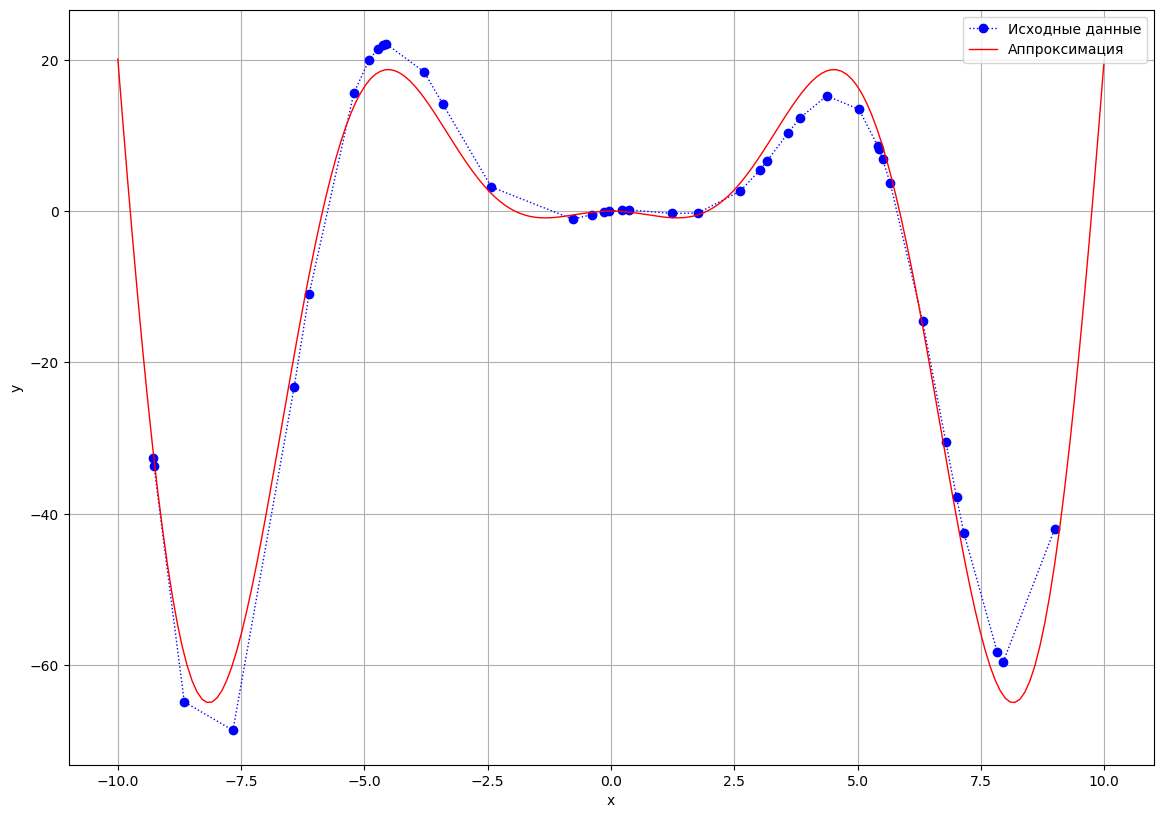

In [9]:
x_res=np.linspace(-10., 10., 200)
y_res=f(x_res,a,b,c)
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10), dpi=100)
axes.plot(points.x, points.y, '-o', color="blue", linewidth=1.0, linestyle=":", label="Исходные данные")
axes.plot(x_res, y_res, color="red", linewidth=1.0, linestyle="-", label="Аппроксимация")
axes.grid()
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend(loc='upper right')
plt.show()